# _Predictive Maintenance Model for a Delivery Company (Classification)_

_Bu projede, bir teslimat şirketinin ekipmanlarının arıza risklerini tahmin eden bir sınıflandırma modeli oluşturacağız. Model, bakım ihtiyaçlarını önceden belirlemeyi amaçlamaktadır._ 

_SMOTE kütüphanesini içe aktar (dengesiz veri setlerini dengelemek için)_ <br>
_from imblearn.over_sampling import SMOTE_ <br><br>
_SMOTE objesini oluştur_ <br>
_oversample = SMOTE()_<br>
_Özellikler (x) ve hedef değişken (y) üzerinde SMOTE uygula_ <br>
_Böylece azınlık sınıfından sentetik örnekler üretilir ve veri dengelenir_ <br>
_x, y = oversample.fit_resample(x, y)_<br>

### _İmport_

In [1]:
# Veri işleme ve analiz kütüphaneleri
import pandas as pd          # Veri setlerini okumak ve DataFrame olarak işlemek için
import numpy as np           # Sayısal hesaplamalar ve matris işlemleri için
import datetime              # Tarih ve saat işlemleri için
import pickle                # Modelleri kaydetmek ve yüklemek için

# Görselleştirme kütüphaneleri
import seaborn as sns        # İstatistiksel veri görselleştirme
import matplotlib.pyplot as plt  # Grafik çizmek için
import warnings
warnings.filterwarnings('ignore')  # Uyarıları gizle

# Veri seti analizi ve sınıf dağılımı
from collections import Counter  # Sınıf dağılımını saymak için

# Makine öğrenmesi modelleri
from sklearn.naive_bayes import GaussianNB, BernoulliNB  # Naive Bayes sınıflandırıcıları
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Topluluk yöntemleri
from sklearn.neighbors import KNeighborsClassifier  # K-en yakın komşu sınıflandırıcı

# Dengesiz veri setlerini işleme
from imblearn.over_sampling import SMOTE  # Azınlık sınıfına sentetik örnek ekleme

# Model değerlendirme ve çapraz doğrulama
from sklearn.datasets import make_classification  # Örnek veri seti oluşturmak için
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold  # Model doğrulama

### _Eda_

In [2]:
df = pd.read_csv('failure.csv')

# CSV dosyasını oku ve DataFrame olarak df değişkenine ata

In [3]:
df.head()

# Veri setinin ilk 5 satırını görüntüle, yapısını ve örnek verileri incele

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

# Veri setinin son 5 satırını görüntüle, veri yapısının tamamını kontrol etmek için

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,2015-11-02,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
df.sample()

# Veri setinden rastgele bir örnek satır göster, verinin çeşitliliğini hızlıca görmek için

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
84636,2015-05-23,S1F0T24J,0,111635656,0,0,0,12,235611,0,0,0


In [6]:
df.shape

# Veri setinin satır ve sütun sayısını görüntüle 

(124494, 12)

In [7]:
df.info()

# Veri setinin sütunları, veri tipleri ve eksik değerler hakkında özet bilgi al

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
df.describe()

# Sayısal sütunlar için temel istatistikleri görüntüle (ortalama, medyan, min, max, çeyrekler)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [9]:
df.isnull().sum().sort_values(ascending=True)

# Her sütundaki eksik değerlerin sayısını hesapla ve azdan çoğa doğru sırala

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [10]:
df.corr(numeric_only=True)

# Sayısal sütunlar arasındaki korelasyonu hesapla
# 1: güçlü pozitif, -1: güçlü negatif, 0: ilişkisiz

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


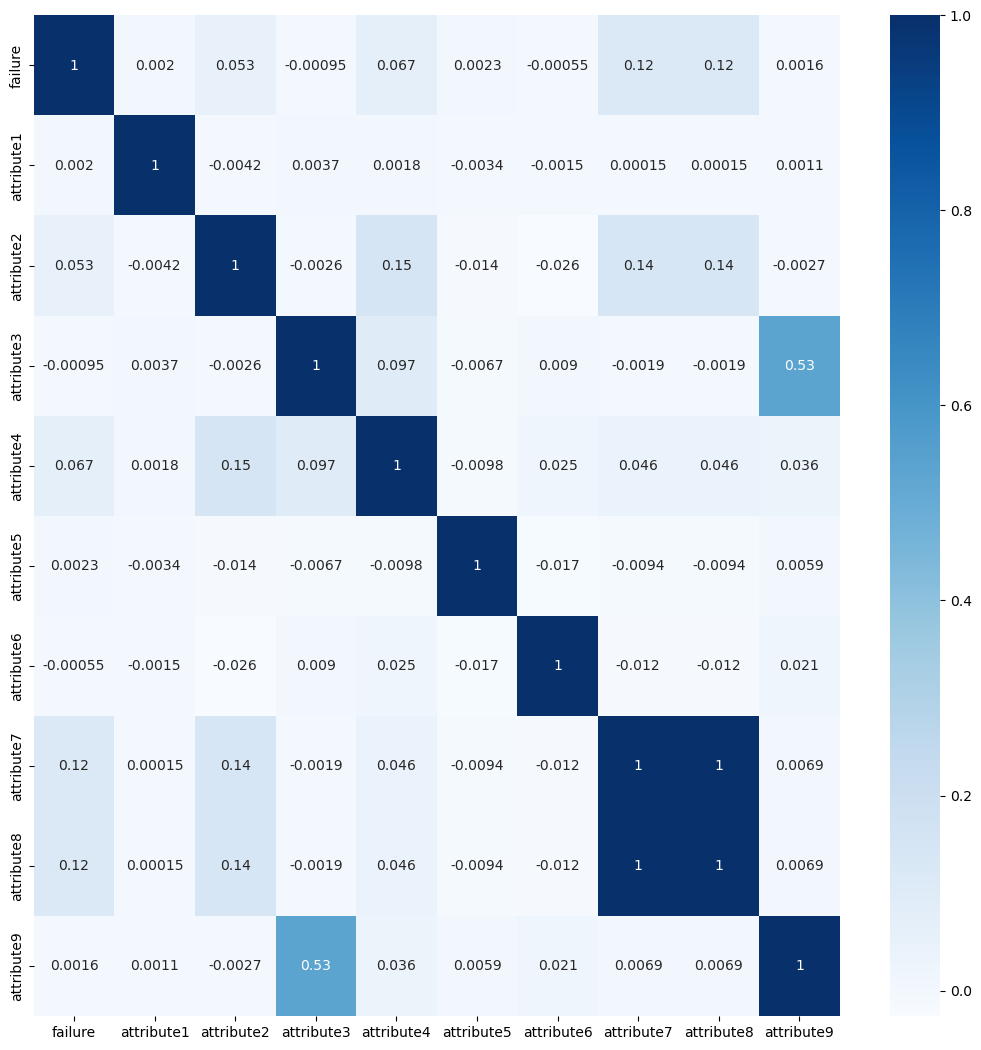

In [11]:
plt.figure(figsize=(13,13))

sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

# Korelasyon matrisini görselleştir
# figsize ile grafiğin boyutunu ayarla
# annot=True ile her hücreye korelasyon değerlerini yazdır
# cmap='Blues' ile renk skalasını mavi tonlarında uygula

### _Feature Engineering_

In [12]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

# 'date' sütununu datetime formatına dönüştür
# format='%Y-%m-%d' ile yıl-ay-gün formatını belirt

In [13]:
# Tarih sütunundan yıl bilgisini çıkar ve 'year' sütununa ata
df['year'] = df['date'].dt.year

# Tarih sütunundan ay bilgisini çıkar ve 'month' sütununa ata
df['month'] = df['date'].dt.month

# Tarih sütunundan gün bilgisini çıkar ve 'day' sütununa ata
df['day'] = df['date'].dt.day

In [14]:
df.head()

# Tarih sütunundan yıl, ay ve gün bilgilerini ekledikten sonra
# veri setinin ilk 5 satırını görüntüle

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015,1,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1


In [15]:
df=df.drop(['date','device'],axis=1)

# Analiz ve modelleme için gereksiz olan 'date' ve 'device' sütunlarını sil

### _SMOTE_

In [16]:
# Özellikleri (bağımsız değişkenler) seç
x = df.drop(['failure'], axis=1)

# Hedef değişkeni (bağımlı değişken) seç
y = df[['failure']]

In [17]:
x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.98],
    random_state=125
)

# Örnek bir dengesiz sınıflandırma veri seti oluştur
# n_samples=1000: toplam örnek sayısı
# n_features=2: özellik sayısı
# n_redundant=0: gereksiz özellik yok
# n_clusters_per_class=1: her sınıf için tek küme
# weights=[0.98]: sınıflar çok dengesiz (azınlık %2)
# random_state=125: tekrar üretilebilirlik için sabit tohum

In [18]:
# SMOTE objesini oluştur
oversample = SMOTE()

# SMOTE uygulayarak azınlık sınıfına sentetik örnekler ekle
x, y = oversample.fit_resample(x, y)

# Yeni y sınıf dağılımını say
labels = Counter(y)

# Sonuçları yazdır
print("Aşırı örneklemeden sonra y etiketleri:")
print(labels)

Aşırı örneklemeden sonra y etiketleri:
Counter({np.int64(0): 970, np.int64(1): 970})


In [19]:
Counter({0: 124494, 1: 124494})

# Azınlık sınıfı (1) çoğunluk sınıfı (0) ile eşitlenmiş, veri artık dengeli.

Counter({0: 124494, 1: 124494})

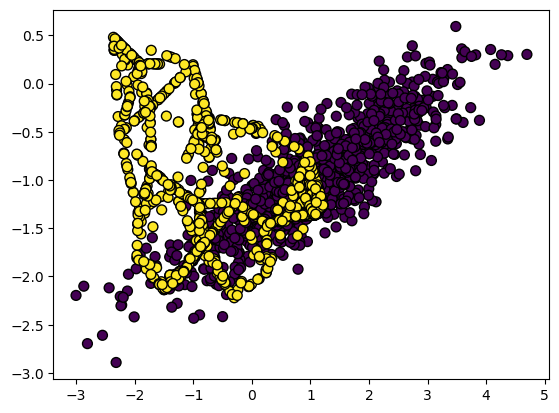

In [20]:
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=50, edgecolor="k");

# İki özellikli veri setini görselleştir
# x[:, 0] ve x[:, 1]: iki özellik
# marker="o": nokta şekli
# c=y: renkleri sınıfa göre ayarla
# s=50: nokta boyutu
# edgecolor="k": kenar rengi siyah

### _Modelling_

In [21]:
# Farklı sınıflandırıcı modelleri oluştur

# Bernoulli Naive Bayes (ikili veriler için uygun)
BNB = BernoulliNB()

# Gaussian Naive Bayes (sayısal veriler için uygun)
GNB = GaussianNB()

# Random Forest (topluluk yöntemi, karar ağaçları kullanır)
RFC = RandomForestClassifier()

# Gradient Boosting Classifier (topluluk yöntemi, ardışık öğrenme)
GBC = GradientBoostingClassifier()

# K-Nearest Neighbors (k-en yakın komşu)
KNC = KNeighborsClassifier()

In [22]:
# Modeli seç (Bernoulli Naive Bayes)
model = BNB

# Çapraz doğrulama stratejisi: 10 katlı, 3 tekrar, sınıf dağılımını korur
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Modeli çapraz doğrulama ile değerlendir, AUC skorunu kullan
result = cross_val_score(model, x, y, scoring="roc_auc", cv=cv, n_jobs=-1)

# Ortalama AUC değerini yazdır
print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.745


In [23]:
# Modeli seç (Gaussian Naive Bayes)
model = GNB

# Çapraz doğrulama stratejisi: 10 katlı, 3 tekrar, sınıf dağılımını korur
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Modeli çapraz doğrulama ile değerlendir, AUC skorunu kullan
result = cross_val_score(model, x, y, scoring="roc_auc", cv=cv, n_jobs=-1)

# Ortalama AUC değerini yazdır
print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.822


In [24]:
# Modeli seç (Random Forest Classifier)
model = RFC

# Çapraz doğrulama stratejisi: 10 katlı, 3 tekrar, sınıf dağılımını korur
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Modeli çapraz doğrulama ile değerlendir, AUC skorunu kullan
result = cross_val_score(model, x, y, scoring="roc_auc", cv=cv, n_jobs=-1)

# Ortalama AUC değerini yazdır
print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.944


In [25]:
# Modeli seç (Gradient Boosting Classifier)
model = GBC

# Çapraz doğrulama stratejisi: 10 katlı, 3 tekrar, sınıf dağılımını korur
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Modeli çapraz doğrulama ile değerlendir, AUC skorunu kullan
result = cross_val_score(model, x, y, scoring="roc_auc", cv=cv, n_jobs=-1)

# Ortalama AUC değerini yazdır
print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.934


In [26]:
# Modeli seç (K-Nearest Neighbors Classifier)
model = KNC

# Çapraz doğrulama stratejisi: 10 katlı, 3 tekrar, sınıf dağılımını korur
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Modeli çapraz doğrulama ile değerlendir, AUC skorunu kullan
result = cross_val_score(model, x, y, scoring="roc_auc", cv=cv, n_jobs=-1)

# Ortalama AUC değerini yazdır
print("Mean AUC: %.3f" % np.mean(result))

Mean AUC: 0.936


In [27]:
import pickle

# Modeli eğit (örnek: Random Forest)
model = RFC
model.fit(x, y)

# Modeli dosyaya kaydet
with open('predictive_maintenance_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


In [28]:
# Modeli yükle
#with open('predictive_maintenance_model.pkl', 'rb') as file:
   # loaded_model = pickle.load(file)

# Tahmin yap
#predictions = loaded_model.predict(x)

_Bu projede, bir teslimat şirketinin ekipman arızalarını tahmin etmek için bir sınıflandırma modeli oluşturduk._ <br>
_En iyi sonucu Random Forest Classifier ile elde ettik_